In [3]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/1a/b4ab4b8f8b3a41fade4899fd00b5b2d2dad0981f3e1bb10df4c522975fd7/tensorflow-2.15.0.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Obta

  Obtaining dependency information for cachetools<6.0,>=2.0.0 from https://files.pythonhosted.org/packages/a2/91/2d843adb9fbd911e0da45fbf6f18ca89d07a087c3daa23e955584f90ebf4/cachetools-5.3.2-py3-none-any.whl.metadata
  Using cached cachetools-5.3.2-py3-none-any.whl.metadata (5.2 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 832.0 kB/s eta 0:00:00 eta 0:00:01m0:00:34
Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
Using cached libclang-16.0.6-py2.py3-none-manylinux2010_x86_64.whl (22.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 1.4 MB/s eta 0:00:00m eta 0:00:010:00:01
Using c

# Problem statement: 
The dataset comprises 5,863 JPEG X-Ray images and is categorised into two types (Pneumonia and Normal), organised into three folders: train, test, and val. Each folder contains subfolders for each image type.

These chest X-ray images (anterior-posterior view) were sourced from paediatric patients aged one to five years at a renowned hospital. The X-rays were part of the routine clinical care of these patients.

As a data scientist working in the healthcare industry, your task is to develop a convolutional neural network (CNN) model that can classify medical images into their respective categories. The model should be able to accurately identify the type of medical image shown in an image, based on the image itself.

In [4]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

2024-01-10 21:13:03.922892: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-10 21:13:04.126729: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 21:13:04.126759: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 21:13:04.138558: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 21:13:04.147360: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-10 21:13:04.148642: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [5]:
# Set Parameters and Directory Paths
img_size = (150, 150)
batch_size = 32
train_dir = "dataset/train"
val_dir = "dataset/val"
test_dir = "dataset/test"

In [6]:

# Load and Preprocess Datasets
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    label_mode="binary"
)

val_dataset = image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary"
)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary"
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [7]:
# Build the CNN Model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [8]:
# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:

# Train the Model
epochs = 15
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=val_dataset,
)

Epoch 1/15


2024-01-10 21:14:45.916215: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89718784 exceeds 10% of free system memory.
2024-01-10 21:14:46.548292: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89718784 exceeds 10% of free system memory.


  1/163 [..............................] - ETA: 8:35 - loss: 3.5251 - accuracy: 0.6250

2024-01-10 21:14:46.753537: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89718784 exceeds 10% of free system memory.


  2/163 [..............................] - ETA: 2:06 - loss: 60.1826 - accuracy: 0.6719

2024-01-10 21:14:47.340850: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89718784 exceeds 10% of free system memory.
2024-01-10 21:14:47.538486: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89718784 exceeds 10% of free system memory.


163/163 [==============================] - 131s 789ms/step - loss: 1.5626 - accuracy: 0.8533 - val_loss: 0.5587 - val_accuracy: 0.7500
Epoch 2/15
163/163 [==============================] - 125s 759ms/step - loss: 0.1640 - accuracy: 0.9385 - val_loss: 0.3695 - val_accuracy: 0.8750
Epoch 3/15
163/163 [==============================] - 123s 748ms/step - loss: 0.1397 - accuracy: 0.9477 - val_loss: 0.4434 - val_accuracy: 0.8125
Epoch 4/15
163/163 [==============================] - 125s 762ms/step - loss: 0.1100 - accuracy: 0.9599 - val_loss: 0.4112 - val_accuracy: 0.8750
Epoch 5/15
163/163 [==============================] - 123s 746ms/step - loss: 0.0842 - accuracy: 0.9693 - val_loss: 0.1777 - val_accuracy: 0.9375
Epoch 6/15
163/163 [==============================] - 122s 742ms/step - loss: 0.0872 - accuracy: 0.9657 - val_loss: 0.1755 - val_accuracy: 0.9375
Epoch 7/15
163/163 [==============================] - 120s 734ms/step - loss: 0.0935 - accuracy: 0.9664 - val_loss: 0.2915 - val_accura

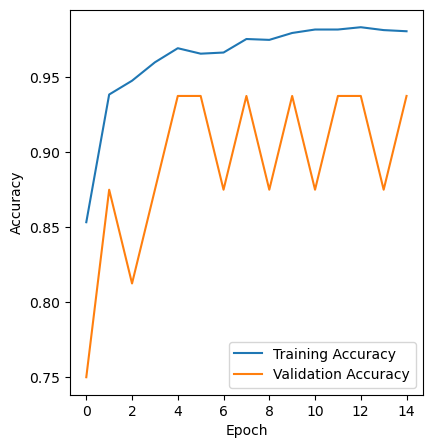

In [10]:
# Plotting the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

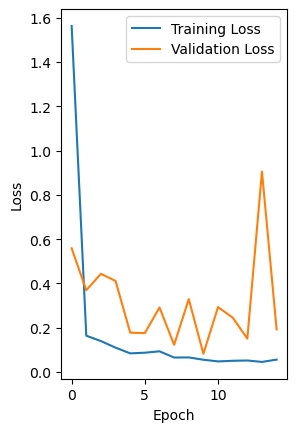

In [11]:
# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:

# Evaluate on the Test Dataset
eval_result = model.evaluate(test_dataset)
print("Test Accuracy:", eval_result[1])


20/20 [==============================] - 5s 199ms/step - loss: 1.3909 - accuracy: 0.7548
Test Accuracy: 0.754807710647583
